# Name: Shakshi Aryal
# Group: L5CG7
# 5CS037: Regression Task


# How can machine learning models predict water quality indicators, such as pH and turbidity,based on physical and chemical properties of water?

## 1. Exploratory Data Analysis and Data Understanding :



In [40]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Loading Dataset
url = "https://raw.githubusercontent.com/Shakshi-Aryal/DATASETS/04b41243cb9b149de413dd9b1984f7d845ef2085/water_potability.csv"
water_data = pd.read_csv(url)

print(water_data.head(5))


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


### Checking columns, shape and null values

In [42]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [43]:
water_data.shape

(3276, 10)

In [44]:
water_data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [45]:
#All columns with missing values are numerical so using mean to fill the values
water_data.fillna(water_data.median(),inplace=True)
water_data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


### Again analyzing data

In [46]:
water_data.duplicated().sum()

0

In [47]:
water_data.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3115
Turbidity,3276
Potability,2


In [48]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [49]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Data Visulization

Text(0.5, 1.0, 'Distribution of pH Levels\n')

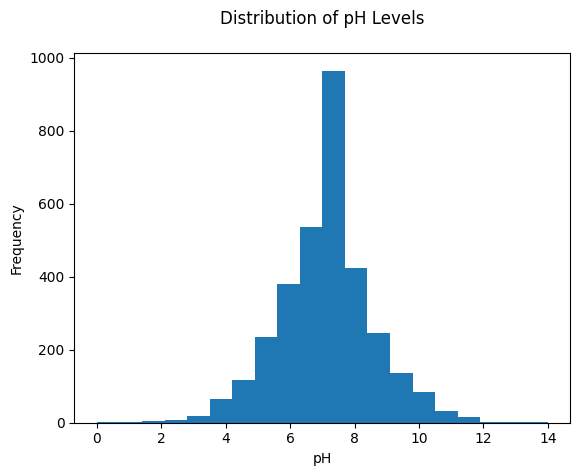

In [50]:
plt.hist(water_data['ph'],bins=20)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Distribution of pH Levels\n')

Text(0.5, 1.0, 'Distribution of Hardness Levels\n')

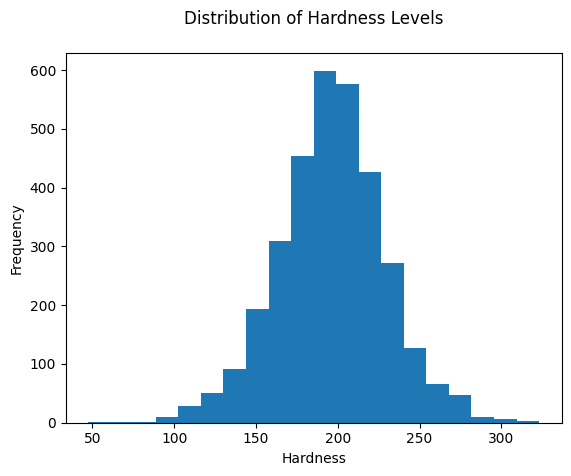

In [51]:
plt.hist(water_data['Hardness'],bins=20)
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.title('Distribution of Hardness Levels\n')

Text(0.5, 1.0, 'Distribution of Solids Levels\n')

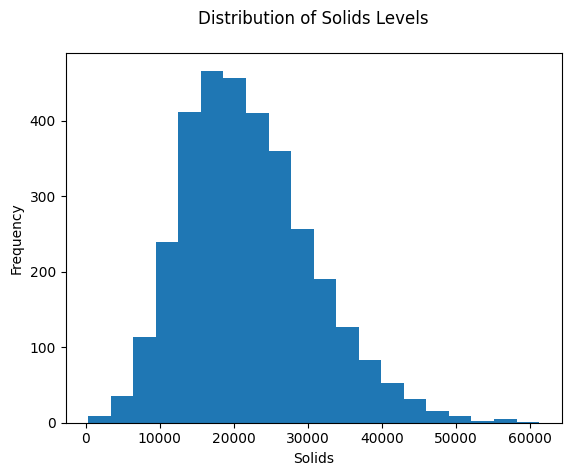

In [52]:
plt.hist(water_data['Solids'],bins=20)
plt.xlabel('Solids')
plt.ylabel('Frequency')
plt.title('Distribution of Solids Levels\n')

Text(0.5, 1.0, 'Distribution of Chloramines Levels\n')

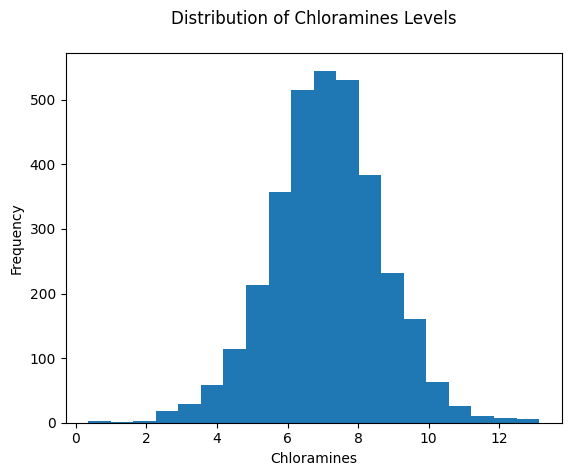

In [53]:
plt.hist(water_data['Chloramines'],bins=20)
plt.xlabel('Chloramines')
plt.ylabel('Frequency')
plt.title('Distribution of Chloramines Levels\n')

In [54]:
# Standardizing the dataset by scaling features to have mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
water_data_scaled=pd.DataFrame(scaler.fit_transform(water_data),columns=water_data.columns)
water_data_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,-0.799775
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,-0.799775
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,-0.799775
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,-0.799775
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,-0.799775


# 2. Linear Regression from scratch

In [55]:
# Function to cap outliers using the IQR method (Winsorization)
def cap_outliers(df):
    df_capped = df.copy()
    for col in df.columns:

        # Applys only to numerical columns
        if df[col].dtype in ['float64', 'int64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Caps values instead of removing them
            df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df_capped[col])

    return df_capped

# Applys outlier capping
water_data_capped = cap_outliers(water_data_scaled)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=water_data_capped.drop('ph',axis=1).values
y=water_data_capped['ph'].values

In [58]:
# 20% of the data will be used for testing, and 80% for training.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class CustomLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=0.01, iterations=1000):
        """
        Custom Linear Regression model compatible with Scikit-Learn tools like RFE.

        Parameters:
        alpha : float, learning rate for gradient descent
        iterations : int, number of iterations for gradient descent
        """
        self.alpha = alpha
        self.iterations = iterations
        # Weights
        self.W = None
        # Required for RFE
        self.coef_ = None
        # Intercept term
        self.intercept_ = None
        # Mimics Scikit-Learn's LinearRegression
        self.fit_intercept_ = True

    def cost_function(self, X, Y):
        """Computes the Mean Squared Error (MSE) cost function."""
        m = len(Y)
        cost = (1 / (2 * m)) * np.sum((np.dot(X, self.W) - Y) ** 2)
        return cost

    def fit(self, X, Y):
        """
        Trains the linear regression model using gradient descent.

        Parameters:
        X : np.array, feature matrix
        Y : np.array, target values

        Returns:
        self : object, trained model
        """
        # Ensures Y is a column vector
        Y = np.array(Y).reshape(-1, 1)

        # Adds intercept term to X if fit_intercept is enabled
        if self.fit_intercept_:
            X = np.c_[np.ones(X.shape[0]), X]

        # Initializes weights
        self.W = np.zeros((X.shape[1], 1))
        m = len(Y)

        # Stores cost history
        self.cost_history = []

        # Gradient Descent
        for i in range(self.iterations):
            Y_pred = np.dot(X, self.W)
            loss = Y_pred - Y
            dw = (1 / m) * np.dot(X.T, loss)

            # Gradient Clipping to prevent divergence
            dw = np.clip(dw, -1, 1)

            self.W -= self.alpha * dw
            self.cost_history.append(self.cost_function(X, Y))

        # Assigns coefficients for Scikit-Learn compatibility
        if self.fit_intercept_:
            self.intercept_ = self.W[0, 0]
            self.coef_ = self.W[1:].flatten()
        else:
            self.intercept_ = 0
            self.coef_ = self.W.flatten()

        return self

    def predict(self, X):
        """
        Predicts the target values for input features.

        Parameters:
        X : np.array, feature matrix

        Returns:
        Y_pred : np.array, predicted target values
        """
        # Converts X to numpy array if not already
        X = np.array(X)

        # Adds intercept term if missing
        if self.fit_intercept_:
            X = np.c_[np.ones(X.shape[0]), X]

        # Flattens ensures correct shape
        return np.dot(X, self.W).flatten()

    def rmse(self, Y, Y_pred):
        """Computes Root Mean Squared Error (RMSE)."""
        # Ensure correct shape
        Y = np.array(Y).flatten()
        # Ensure correct shape
        Y_pred = np.array(Y_pred).flatten()
        return np.sqrt(np.mean((Y - Y_pred) ** 2))

    def score(self, X, Y):
        """
        Returns the R² score (coefficient of determination).

        Parameters:
        X : np.array, feature matrix
        Y : np.array, actual target values

        Returns:
        r2 : float, R² score
        """
        Y = np.array(Y).flatten()
        Y_pred = self.predict(X)
        mean_y = np.mean(Y)
        ss_tot = np.sum((Y - mean_y) ** 2)
        ss_res = np.sum((Y - Y_pred) ** 2)
        return 1 - (ss_res / ss_tot)

    def get_params(self, deep=True):
        # Returns model parameters for hyperparameter tuning.
        return {"alpha": self.alpha, "iterations": self.iterations}

    def set_params(self, **params):
        # Sets hyperparameters for tuning.
        for key, value in params.items():
            setattr(self, key, value)
        return self


In [60]:
model = CustomLinearRegression(alpha=0.01, iterations=500000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train)
print("For train set")
print("RMSE:", model.rmse(y_train, y_pred_train))
print("R2 Score:", model.score(X_train, y_train))
print("For test set")
print("RMSE:", model.rmse(y_test, y_pred_test))
print("R2 Score:", model.score(X_test, y_test))

For train set
RMSE: 0.9297488638252464
R2 Score: 0.015518589556481333
For test set
RMSE: 0.9400564915479428
R2 Score: 0.02510240797376484


## 3. Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
regr=RandomForestRegressor()
regr.fit(X_train,y_train)
y_pred_test=regr.predict(X_test)
y_pred_train=regr.predict(X_train)
print("For train set")
print("RMSE:", mean_squared_error(y_train, y_pred_train))
print("R2 Score:", r2_score(y_train, y_pred_train))
print("For test set")
print("RMSE:", mean_squared_error(y_test, y_pred_test))
print("R2 Score:", r2_score(y_test, y_pred_test))

For train set
RMSE: 0.11479338734446361
R2 Score: 0.8692646365335084
For test set
RMSE: 0.8628403171632887
R2 Score: 0.04812149042795977


# 4. HyperParameter validation

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Defines hyperparameter grid
param_distributions = {
    # Searches over alpha values from 0.0001 to 1
    "alpha": np.logspace(-4, 0, 10),
    # Searches over iteration values
    "iterations": [500, 1000, 2000, 5000]
}

# Initializes model
model = CustomLinearRegression()
random_search = RandomizedSearchCV(
    model, param_distributions, n_iter=10, cv=5, scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Gets best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

# Displays results
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE Score (Negative): {best_score}")


Best Hyperparameters: {'iterations': 500, 'alpha': 0.002154434690031882}
Best RMSE Score (Negative): -0.9329019737304908


In [63]:
param_distributions_rf = {
    # Number of trees
    "n_estimators": [50, 100, 200, 500],
    # Maximum depth of trees
    "max_depth": [None, 10, 20, 30],
     # Minimum samples required to split a node
    "min_samples_split": [2, 5, 10],
    # Minimum samples required at a leaf node
    "min_samples_leaf": [1, 2, 4],
    # Whether bootstrap sampling is used
    "bootstrap": [True, False]
}
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions_rf, n_iter=10, cv=5,
    scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1
)
random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")
print(f"Best RMSE Score (Negative): {best_score_rf}")

Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best RMSE Score (Negative): -0.902607879601543


# 5. Feature Selection

In [64]:
from sklearn.feature_selection import RFE
model = CustomLinearRegression()

# Defines number of features to select
num_features_to_select = 7  # Change this based on your needs

# Applys RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Gets selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Gets ranking of features (lower is better)
feature_ranking = rfe.ranking_

# Filters dataset to use only selected features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Displays selected feature indices and ranking
print("Selected Feature Indices:", selected_feature_indices)
print("Feature Ranking:", feature_ranking)

Selected Feature Indices: [0 1 2 3 4 5 7]
Feature Ranking: [1 1 1 1 1 1 2 1 3]


In [65]:
model = RandomForestRegressor()

# Defines number of features to select
num_features_to_select = 7  # Change this based on your needs

# Applys RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Gets selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Gets ranking of features (lower is better)
feature_ranking = rfe.ranking_

# Filters dataset to use only selected features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Displays selected feature indices and ranking
print("Selected Feature Indices:", selected_feature_indices)
print("Feature Ranking:", feature_ranking)

Selected Feature Indices: [0 1 2 4 5 6 7]
Feature Ranking: [1 1 1 2 1 1 1 1 3]


# 6. Final Model

Because my randomforest performed much better than scratch Linear model for my dataset, I will use RandomForestRegressor.

In [66]:
final_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf["n_estimators"],
    max_depth=best_params_rf["max_depth"],
    min_samples_split=best_params_rf["min_samples_split"],
    min_samples_leaf=best_params_rf["min_samples_leaf"],
    bootstrap=best_params_rf["bootstrap"],
    random_state=42
)

# Train the model using only the selected features
final_rf_model.fit(X_train_selected, y_train)

# Makes Predictions on Train and Test Data
y_pred_train_final = final_rf_model.predict(X_train_selected)
y_pred_test_final = final_rf_model.predict(X_test_selected)

# Evaluates Final Model Performance
print("\nFor Train Set")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_final)))
print("R² Score:", r2_score(y_train, y_pred_train_final))

print("\nFor Test Set")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_final)))
print("R² Score:", r2_score(y_test, y_pred_test_final))


For Train Set
RMSE: 0.7326281108032815
R² Score: 0.38871552752170246

For Test Set
RMSE: 0.9449025576776631
R² Score: 0.015025150661221787
